# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
OPTIMIZER = ["SGD","RMSprop","Adagrad","Adam"]

Experiment with LR = 0.100000
Experiment with OPTIMIZER = SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/500

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 95us/step - loss: 14.4454 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 4s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 4s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 5s 92us/step - loss: 14.4456 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 86us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [===

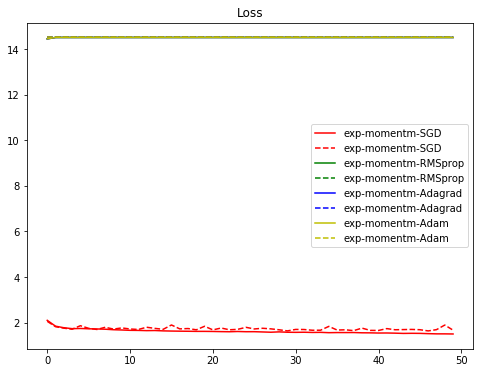

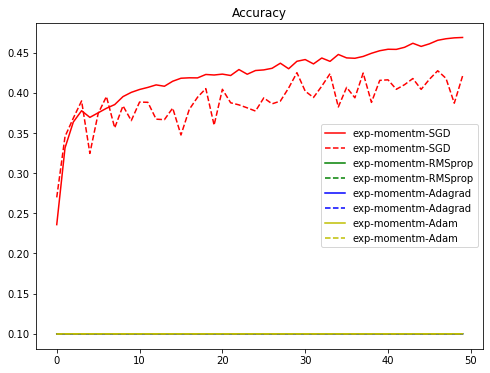

Experiment with LR = 0.010000
Experiment with OPTIMIZER = SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/500

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 96us/step - loss: 14.4482 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 4s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 90us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 5s 93us/step - loss: 14.4441 - acc: 0.0996 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 4s 87us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 4s 87us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 4s 87us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 87us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 87us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 87us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 101us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 101us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 5s 101us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/500

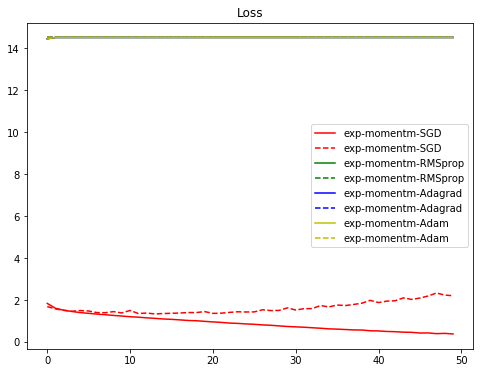

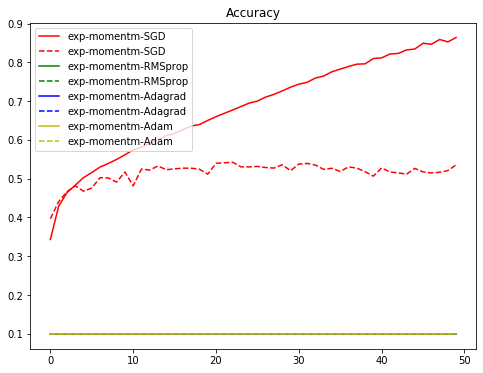

Experiment with LR = 0.001000
Experiment with OPTIMIZER = SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/500

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.2277 - acc: 0.2197 - val_loss: 1.9799 - val_acc: 0.2947
Epoch 2/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.8800 - acc: 0.3220 - val_loss: 1.7926 - val_acc: 0.3539
Epoch 3/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.7809 - acc: 0.3630 - val_loss: 1.7257 - val_acc: 0.3895
Epoch 4/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7122 - acc: 0.3870 - val_loss: 1.7761 - val_acc: 0.3703
Epoch 5/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.6617 - acc: 0.4067 - val_loss: 1.6969 - val_acc: 0.3850
Epoch 6/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.6191 - acc: 0.4189 - val_loss: 1.6677 - val_acc: 0.3868
Epoch 7/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.5787 - acc: 0.4371 - val_loss: 1.5852 - val_acc

50000/50000 [==============================] - 4s 87us/step - loss: 1.8043 - acc: 0.3656 - val_loss: 1.7751 - val_acc: 0.3747
Epoch 3/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.7357 - acc: 0.3909 - val_loss: 1.7430 - val_acc: 0.3929
Epoch 4/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6904 - acc: 0.4075 - val_loss: 1.6735 - val_acc: 0.4165
Epoch 5/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6531 - acc: 0.4208 - val_loss: 1.6667 - val_acc: 0.4130
Epoch 6/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6259 - acc: 0.4303 - val_loss: 1.6235 - val_acc: 0.4280
Epoch 7/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.6010 - acc: 0.4403 - val_loss: 1.6131 - val_acc: 0.4353
Epoch 8/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.5813 - acc: 0.4490 - val_loss: 1.5945 - val_acc: 0.4357
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 5s 101us/step - loss: 1.6105 - acc: 0.4239 - val_loss: 1.5551 - val_acc: 0.4455
Epoch 4/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.5434 - acc: 0.4477 - val_loss: 1.5420 - val_acc: 0.4497
Epoch 5/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5034 - acc: 0.4643 - val_loss: 1.5597 - val_acc: 0.4403
Epoch 6/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4617 - acc: 0.4788 - val_loss: 1.4790 - val_acc: 0.4728
Epoch 7/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4320 - acc: 0.4881 - val_loss: 1.4699 - val_acc: 0.4728
Epoch 8/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4026 - acc: 0.5004 - val_loss: 1.4128 - val_acc: 0.4946
Epoch 9/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.3716 - acc: 0.5095 - val_loss: 1.4302 - val_acc: 0.4919
Epoch 10/50
50000/50000 [====================

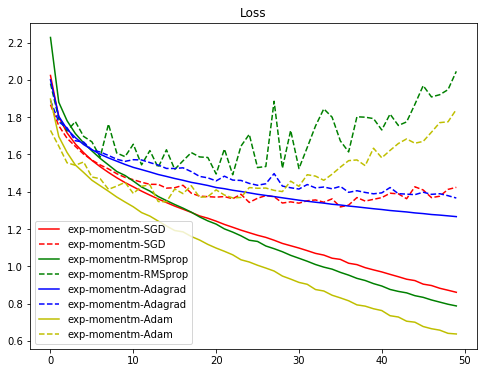

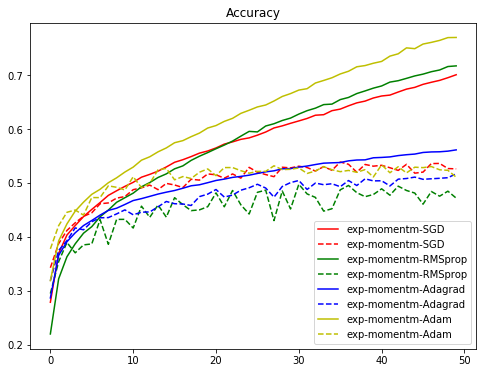

Experiment with LR = 0.000100
Experiment with OPTIMIZER = SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/500

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.9666 - acc: 0.2915 - val_loss: 1.8818 - val_acc: 0.3321
Epoch 2/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.7852 - acc: 0.3646 - val_loss: 1.8324 - val_acc: 0.3448
Epoch 3/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.7048 - acc: 0.3960 - val_loss: 1.6775 - val_acc: 0.3951
Epoch 4/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.6526 - acc: 0.4131 - val_loss: 1.7783 - val_acc: 0.3478
Epoch 5/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.6100 - acc: 0.4329 - val_loss: 1.6431 - val_acc: 0.4093
Epoch 6/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.5733 - acc: 0.4443 - val_loss: 1.6200 - val_acc: 0.4163
Epoch 7/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.5446 - acc: 0.4529 - val_loss: 1.5414 - val_acc

50000/50000 [==============================] - 4s 87us/step - loss: 1.9274 - acc: 0.3260 - val_loss: 1.9053 - val_acc: 0.3280
Epoch 3/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8841 - acc: 0.3427 - val_loss: 1.8745 - val_acc: 0.3458
Epoch 4/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8577 - acc: 0.3526 - val_loss: 1.8550 - val_acc: 0.3519
Epoch 5/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8390 - acc: 0.3598 - val_loss: 1.8369 - val_acc: 0.3606
Epoch 6/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8240 - acc: 0.3657 - val_loss: 1.8234 - val_acc: 0.3676
Epoch 7/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8117 - acc: 0.3716 - val_loss: 1.8144 - val_acc: 0.3696
Epoch 8/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8014 - acc: 0.3737 - val_loss: 1.8027 - val_acc: 0.3756
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 5s 101us/step - loss: 1.6381 - acc: 0.4232 - val_loss: 1.6065 - val_acc: 0.4300
Epoch 4/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5812 - acc: 0.4441 - val_loss: 1.5697 - val_acc: 0.4492
Epoch 5/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5336 - acc: 0.4579 - val_loss: 1.5646 - val_acc: 0.4442
Epoch 6/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.5004 - acc: 0.4722 - val_loss: 1.5177 - val_acc: 0.4662
Epoch 7/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.4669 - acc: 0.4848 - val_loss: 1.4804 - val_acc: 0.4749
Epoch 8/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4368 - acc: 0.4935 - val_loss: 1.4523 - val_acc: 0.4868
Epoch 9/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4064 - acc: 0.5040 - val_loss: 1.4496 - val_acc: 0.4855
Epoch 10/50
50000/50000 [====================

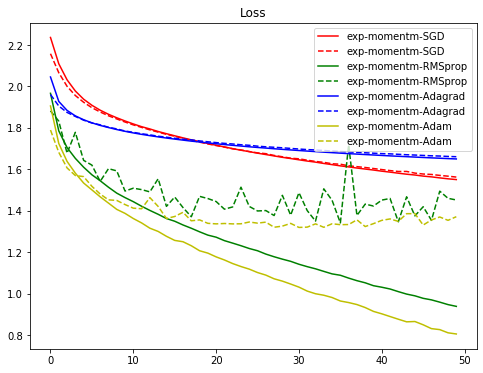

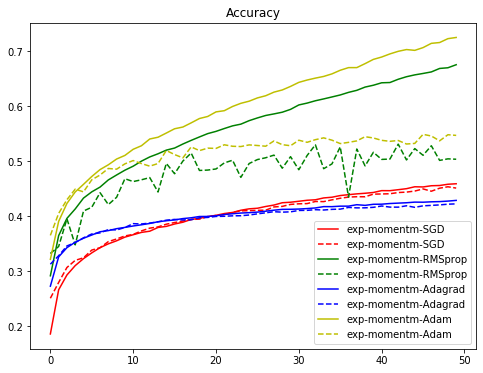

Experiment with LR = 0.000010
Experiment with OPTIMIZER = SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/500

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.1140 - acc: 0.2543 - val_loss: 1.9987 - val_acc: 0.3013
Epoch 2/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.9421 - acc: 0.3227 - val_loss: 1.8989 - val_acc: 0.3398
Epoch 3/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.8683 - acc: 0.3481 - val_loss: 1.8502 - val_acc: 0.3511
Epoch 4/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.8229 - acc: 0.3663 - val_loss: 1.8098 - val_acc: 0.3685
Epoch 5/50
50000/50000 [==============================] - 5s 90us/step - loss: 1.7897 - acc: 0.3792 - val_loss: 1.7817 - val_acc: 0.3760
Epoch 6/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.7637 - acc: 0.3876 - val_loss: 1.7631 - val_acc: 0.3847
Epoch 7/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.7411 - acc: 0.3945 - val_loss: 1.7336 - val_acc

50000/50000 [==============================] - 4s 87us/step - loss: 2.2301 - acc: 0.1966 - val_loss: 2.2116 - val_acc: 0.2146
Epoch 3/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.2007 - acc: 0.2151 - val_loss: 2.1874 - val_acc: 0.2252
Epoch 4/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.1796 - acc: 0.2305 - val_loss: 2.1689 - val_acc: 0.2349
Epoch 5/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.1629 - acc: 0.2390 - val_loss: 2.1538 - val_acc: 0.2437
Epoch 6/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.1491 - acc: 0.2474 - val_loss: 2.1410 - val_acc: 0.2514
Epoch 7/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.1371 - acc: 0.2538 - val_loss: 2.1298 - val_acc: 0.2556
Epoch 8/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.1264 - acc: 0.2587 - val_loss: 2.1198 - val_acc: 0.2613
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 5s 101us/step - loss: 1.8498 - acc: 0.3563 - val_loss: 1.8250 - val_acc: 0.3602
Epoch 4/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.8034 - acc: 0.3731 - val_loss: 1.7872 - val_acc: 0.3697
Epoch 5/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.7683 - acc: 0.3829 - val_loss: 1.7552 - val_acc: 0.3817
Epoch 6/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.7389 - acc: 0.3909 - val_loss: 1.7288 - val_acc: 0.3953
Epoch 7/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.7141 - acc: 0.4010 - val_loss: 1.7039 - val_acc: 0.4035
Epoch 8/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.6907 - acc: 0.4105 - val_loss: 1.6854 - val_acc: 0.4074
Epoch 9/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.6719 - acc: 0.4168 - val_loss: 1.6649 - val_acc: 0.4198
Epoch 10/50
50000/50000 [====================

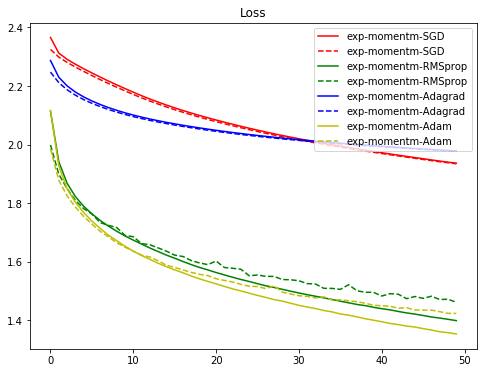

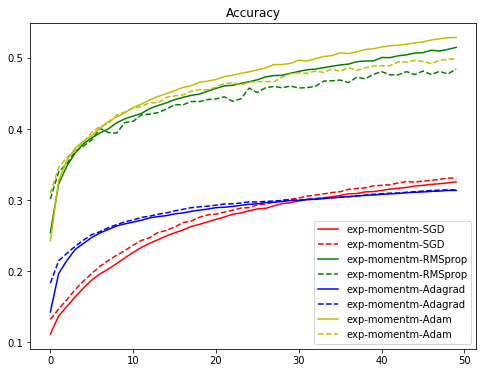

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    print("Experiment with LR = %.6f" % (lr))

    for opt in OPTIMIZER:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with OPTIMIZER = %s" % (opt))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        if(opt == "SGD"):
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
        elif(opt == "RMSprop"):
            optimizer = keras.optimizers.RMSprop(lr=lr, rho=0.9, epsilon=None, decay=0.0)
        elif(opt == "Adagrad"):
            optimizer = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
        else:
            optimizer = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
            
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-momentm-%s" % str(opt)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}
        
    import matplotlib.pyplot as plt
    %matplotlib inline
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()